In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
YEAR = 2023
cs = pd.read_csv(f"../dataset/imbank_customer_data/customer_newCols_{YEAR}.csv", encoding = 'euc-kr')

In [3]:
cs

,Unnamed: 0,기준년월,고객ID,성별,고객등급,자택_시도,수신_요구불예금,수신_거치식예금,수신_적립식예금,대출금액,수신잔고,지역구분,수신대비대출비율,연령대,이탈여부
0,0,202301,2455116820,여,일반등급,대구광역시,0,0,0,0,0,1,0.0,20대,유지
1,1,202301,2455184950,남,일반등급,광주광역시,0,0,0,100000,0,0,0.0,20대,유지
2,2,202301,2455509120,여,일반등급,대구광역시,0,0,0,0,0,1,0.0,20대,이탈
3,3,202301,2455596436,여,일반등급,부산광역시,600000,0,0,0,600000,0,0.0,30대,유지
4,4,202301,2455600426,남,일반등급,경상북도,0,0,0,0,0,1,0.0,30대,이탈
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312019,2312019,202312,9996525010,남,일반등급,대구광역시,0,0,0,0,0,1,0.0,30대,이탈
2312020,2312020,202312,9996550317,남,일반등급,대구광역시,21000000,0,0,0,21000000,1,0.0,30대,이탈
2312021,2312021,202312,9996589620,여,일반등급,경상북도,0,0,0,0,0,1,0.0,30대,이탈
2312022,2312022,202312,9996666899,남,일반등급,경상북도,100000,0,0,0,100000,1,0.0,30대,이탈


In [88]:
TARGET = '수신잔고'

In [114]:
# 간단한 box plot 그리기
# 시각화 그리기 한글폰트 가가

def boxplot(df, target, min=None, max=None):
    plt.rc("font", family = "Malgun Gothic")
    sns.set(font="Malgun Gothic", 
    rc={"axes.unicode_minus":False}, style='white')

    fig, ax = plt.subplots(figsize = (8, 6))
    filtered_data = df[df['연령대'].isin(['20대', '30대'])]
    sns.boxplot(filtered_data, x = '이탈여부', y = target, width=0.3, hue='연령대')
    if min or max:
        plt.ylim(min, max)
    plt.show()

def get_iqr(df, target, churn):
    # 이탈 확인
    _df=df[df['이탈여부']==churn]
    # 이상치 비율 확인
    # 1분위
    q1 = _df[target].quantile(q=0.25)
    # 3분위
    q3 = _df[target].quantile(q=0.75)
    iqr =  q3 - q1

    print(f"{churn} 이상치 경계 min: {q1}, max: {q3}")

    outlier = df[(df[target] >= (q3 + 1.5*iqr)) | (df[target] <= (q1 - 1.5*iqr))]
    ratio = outlier[target].count() / df[target].count()
    print(f"{churn} 이상치 비율: {round(ratio, 3)}")
    df = df[(df[target] < (q3 + 1.5*iqr)) & (df[target] > (q1 - 1.5*iqr))]

    return df

def dropOutlier(df, target):

    churn = get_iqr(df, target, '이탈')
    nonChurn = get_iqr(df, target, '유지')

    df = pd.concat([churn, nonChurn])
    
    return df

def displot(df, target):
    sns.displot(df, x=target, kde=True, hue = '이탈여부')
    plt.show()


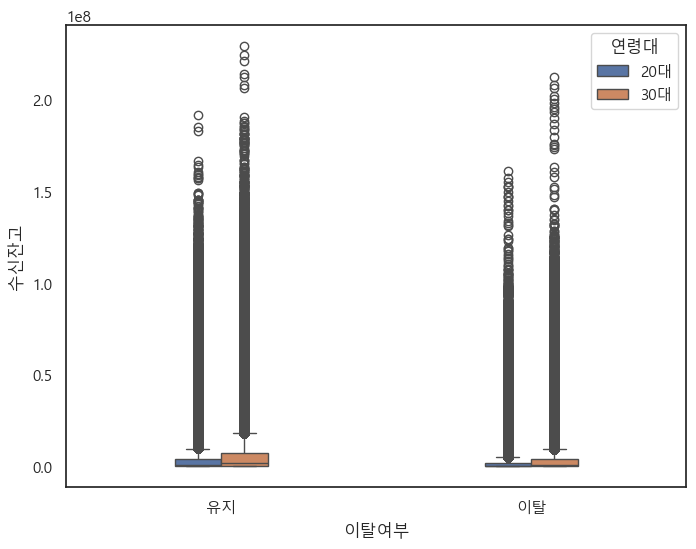

In [78]:
boxplot(cs, TARGET)

이탈 이상치 경계 min: 0.0, max: 2600000.0
이탈 이상치 비율: 0.204
유지 이상치 경계 min: 200000.0, max: 5400000.0
유지 이상치 비율: 0.107


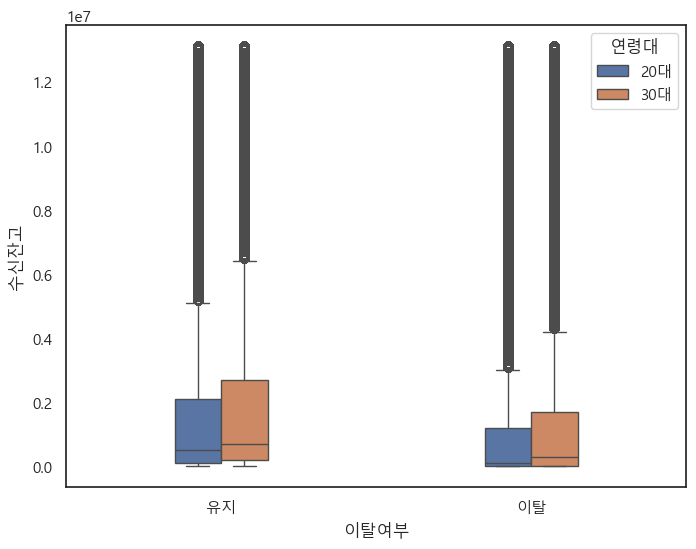

In [116]:
TARGET = '수신잔고'
df = dropOutlier(cs, TARGET)
boxplot(df, TARGET)

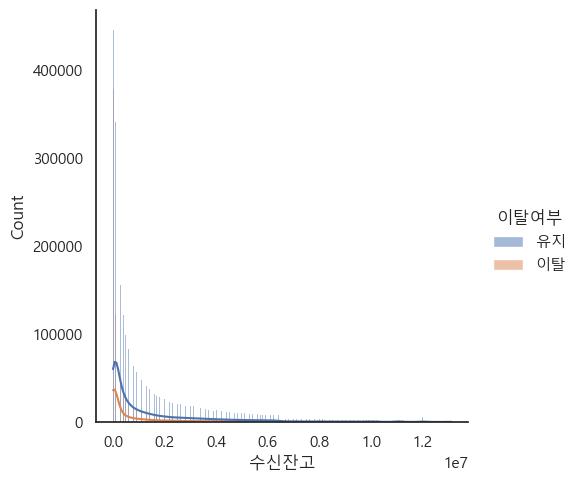

In [ ]:
displot(df,TARGET) # 조정정

이탈 이상치 경계 min: 0.0, max: 0.0
이탈 이상치 비율: 1.0
유지 이상치 경계 min: 0.0, max: 0.0
유지 이상치 비율: 1.0


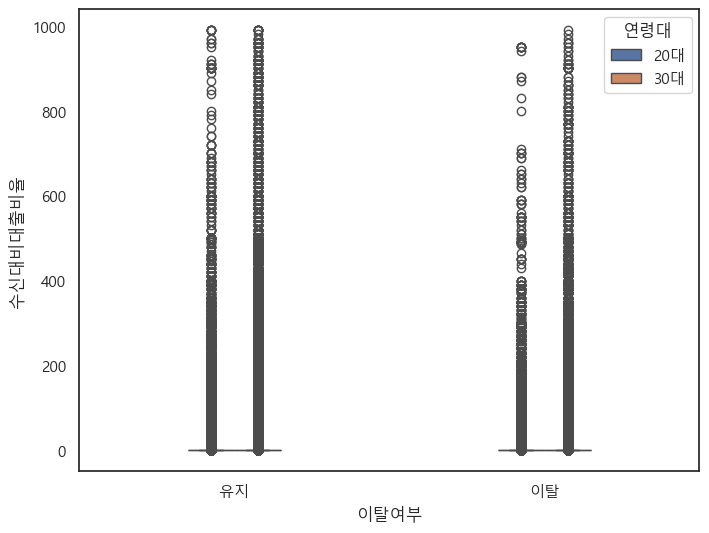

In [118]:
TARGET = '수신대비대출비율'
df= dropOutlier(cs, TARGET)
boxplot(cs, TARGET)

In [119]:
df

,Unnamed: 0,기준년월,고객ID,성별,고객등급,자택_시도,수신_요구불예금,수신_거치식예금,수신_적립식예금,대출금액,수신잔고,지역구분,수신대비대출비율,연령대,이탈여부


In [5]:
c = pd.read_csv(f"../dataset/imbank_card_data/card_newCols_{YEAR}.csv", encoding = 'euc-kr')
c

,거래년월,고객ID,가맹점업종명,월별승인금액합계,월별승인건수평균,이탈여부,연령대
0,202301,4315412612,편 의 점,50000,1.000000,유지,30대
1,202301,6463199548,편 의 점,50000,1.000000,유지,30대
2,202301,4836970091,편 의 점,20000,1.000000,유지,20대
3,202301,5410188013,편 의 점,20000,1.000000,유지,20대
4,202301,3577716603,편 의 점,50000,2.000000,유지,20대
...,...,...,...,...,...,...,...
1613896,202312,2431122077,기타레져업소,1040000,1.307692,유지,20대
1613897,202312,3343332290,기타레져업소,1110000,1.230769,유지,20대
1613898,202312,3433762288,기타레져업소,810000,1.000000,유지,20대
1613899,202312,4406597530,일반한식,2600000,1.037037,유지,30대


In [11]:
c['가맹점업종명'].unique()

array(['편 의 점', '스포츠·레져용품', 'GS주유소', '슈퍼마켓', '스넥', '제과점', '서양음식', '미용원',
       '유아원', '인터넷P/G', '정육점', '한 의 원', '예·체능계학원', '기타음료식품', '기타레져업소',
       '의 원', '화물운송', '일반한식', '주방용식기', '약 국', '농·축·수산품', '치과병원', 'SK주유소',
       '일식·회집', '현대정유(오일뱅크)', '티켓', '기계공구', '독서실', '중국식', '자사카드발행백화점',
       '화장품', '액세서리', '인터넷Mall', '귀금속', '기타 전문점', '문구용품', '기타잡화', '안경',
       '일반서적', '헬스클럽', '피부미용실', '농,축협직영매장', '사우나', '치과의원', '주유소', '철도',
       '단란주점', '영화관', '정장', '공공요금대행서비스/소득공제비대상', '특급호텔', '병 원(응급실운영)',
       '세탁소', 'PG상품권', '쌍용S-OIL', '이동통신요금', '면 세 점', '컴퓨터', '동물병원',
       '애완동물', '의료용품', 'CATV홈쇼핑', '유흥주점', '기타대인서비스', '보습학원', '현대정유가스충전소',
       '레져업소', '기타숙박업', '인터넷종합Mall', '손해보험', '비영리/대상', '주점', '화원',
       '비영리/비대상', '기타4', '주차장', 'DP&E', '기타 교육기관', '대형할인점', '통신기기',
       '위탁급식업', '문화취미기타', '기타가구', '기타 사무용품', '기능학원', '종합용역', '업종미등록',
       '학습지교육', '가례서비스업', '소프트웨어', '종합레져타운', '아동의류', 'E1가스충전소', '고속버스',
       '기타건강식품', 'GS가스충전소', '가전제품', '당구장', '자동차시트·타이어', '가정용품수리', '홍삼제품',
   

In [12]:
len(c['가맹점업종명'].unique())

204

이탈 이상치 경계 min: 30000.0, max: 270000.0
이탈 이상치 비율: 0.269
유지 이상치 경계 min: 110000.0, max: 710000.0
유지 이상치 비율: 0.058


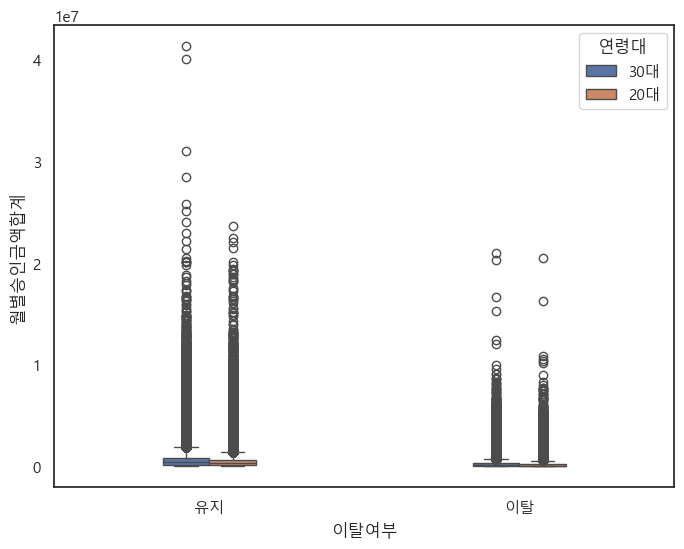

In [120]:
TARGET = '월별승인금액합계'
df = dropOutlier(c, TARGET)
boxplot(c, TARGET)

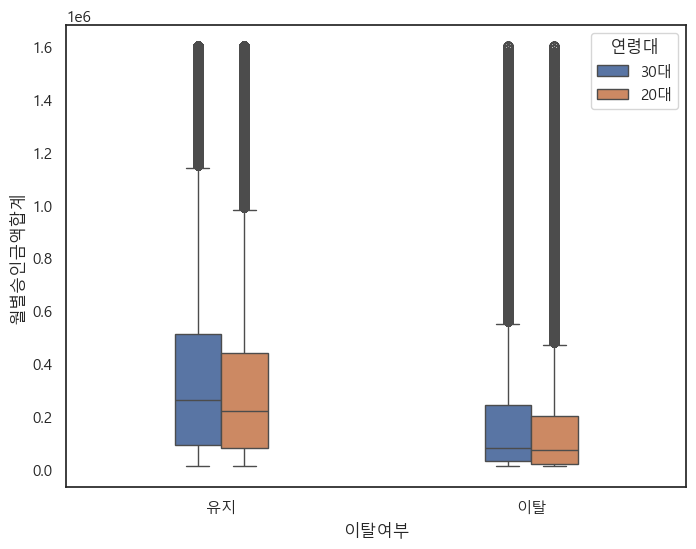

In [121]:
boxplot(df, TARGET)

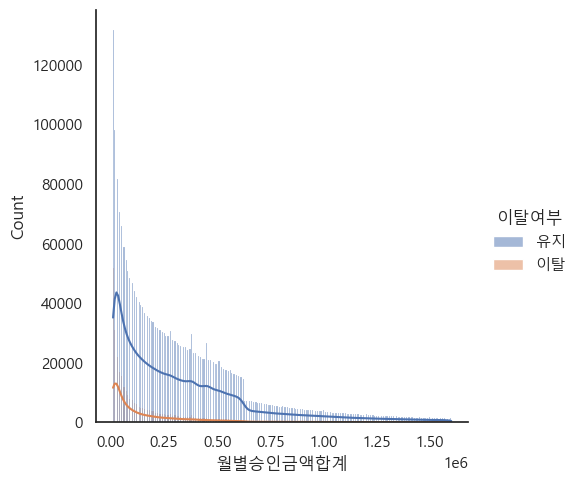

In [122]:
displot(df, TARGET)

In [126]:
TARGET = '월별승인건수평균'
df = dropOutlier(c, TARGET)

이탈 이상치 경계 min: 1.0, max: 1.0
이탈 이상치 비율: 1.0
유지 이상치 경계 min: 1.0, max: 1.0714285714285714
유지 이상치 비율: 0.119


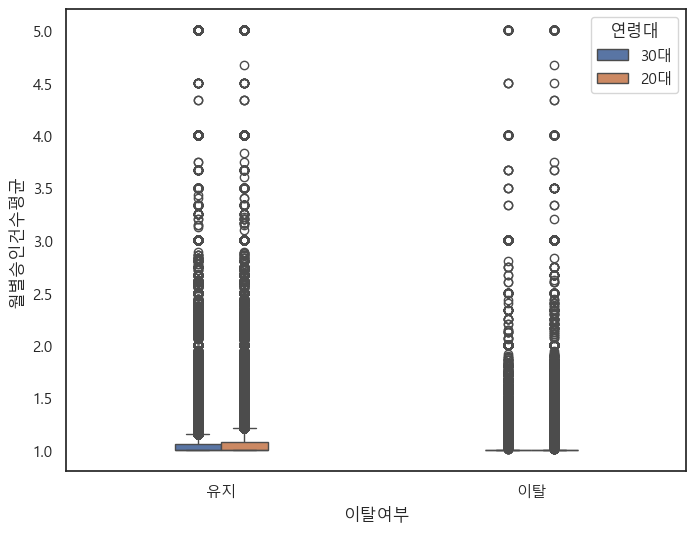

In [124]:
boxplot(c, TARGET)

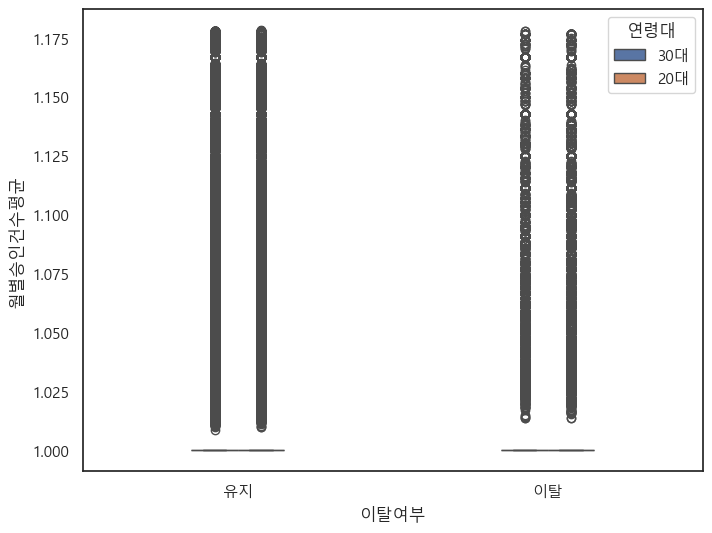

In [127]:
boxplot(df, TARGET)

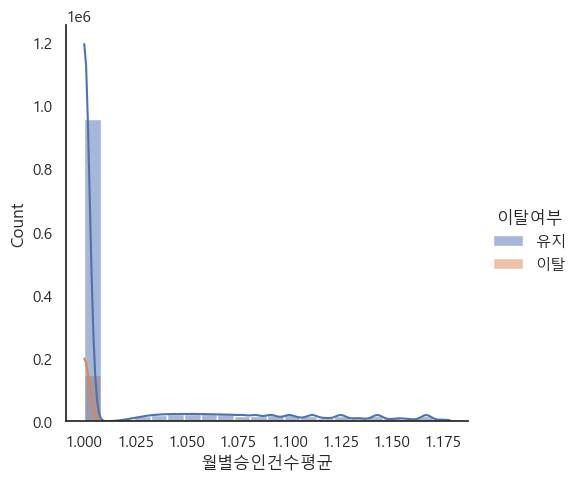

In [128]:
displot(df, TARGET)